# SUICIDES EXPLORATORY DATA

## HEAD OF VARIABLE

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt


pt.offline.init_notebook_mode(connected=True)

dataSuicides = pd.read_csv('C:\\Users\\user\\Documents\\my app\\python_project\\DataScience\\Database\\master.csv')
# dataSuicides = dataSuicides[['country','year','sex','age','suicides_no','population','generation']]
dataSuicides.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [28]:
dataSuicides.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides_pop              0
country-year              0
HDI_for_year          19456
gdp_for_year              0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [29]:
dataSuicides.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [57]:
dataSuicides['age'] = dataSuicides['age'].map(lambda i: i.replace('years',''))
dataSuicides['age']

0        15-24 
1        35-54 
2        15-24 
3          75+ 
4        25-34 
          ...  
27815    35-54 
27816      75+ 
27817     5-14 
27818     5-14 
27819    55-74 
Name: age, Length: 27820, dtype: object

In [2]:
dataSuicides.rename(columns={"suicides/100k pop":"suicides_pop",
                            "HDI for year":"HDI_for_year",
                            " gdp_for_year ($) ":"gdp_for_year",
                            "gdp_per_capita ($) ":"gdp_per_capita",
                            }, inplace=True)
print(dataSuicides.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [35]:
len(dataSuicides.columns)

12

## $\textbf{The suicide rate of Sex}$

In [31]:
dataSuicides.pivot_table(['suicides_no'],['sex']).sort_values(by='suicides_no',ascending=False)

,suicides_no
sex,
male,373.034508
female,112.114306


In [30]:
genderwise_suicide = dataSuicides.pivot_table(index='sex',aggfunc='sum')

c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

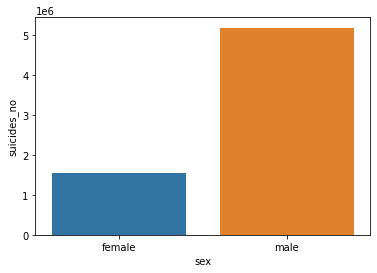

In [32]:
sns.barplot(genderwise_suicide.index,genderwise_suicide.suicides_no)
# sns.set_style('white')

c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



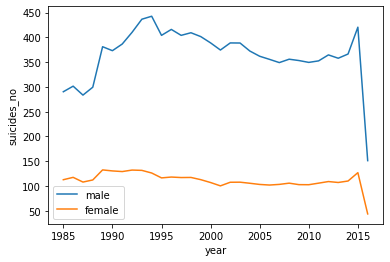

In [33]:
data_men = dataSuicides[dataSuicides.sex == "male"]
data_women = dataSuicides[dataSuicides.sex == "female"]
sns.lineplot(data_men.year, dataSuicides.suicides_no, ci = None)
sns.lineplot(data_women.year, dataSuicides.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

From above, we know that the suicides number of male are about three times higher than the suicides number of female

## $\textbf {The suicide rate of Age}$

In [58]:
dataSuicides.age.unique()

array(['15-24 ', '35-54 ', '75+ ', '25-34 ', '55-74 ', '5-14 '],
      dtype=object)

In [59]:
dataSuicides.pivot_table(['suicides_no'],['age']).sort_values(by='suicides_no',ascending=False)

,suicides_no
age,
35-54,528.250969
55-74,357.269065
25-34,242.118053
15-24,174.179664
75+,140.697544
5-14,11.337093


c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

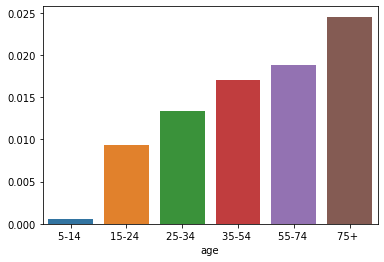

In [73]:
agewise_suicide = dataSuicides.pivot_table(index='age',aggfunc='sum').sort_values(by='year')
sns.barplot(agewise_suicide.index,agewise_suicide.suicides_no*100 / agewise_suicide.population)

C:\Users\user\AppData\Local\Temp/ipykernel_10208/1081454711.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='year'>

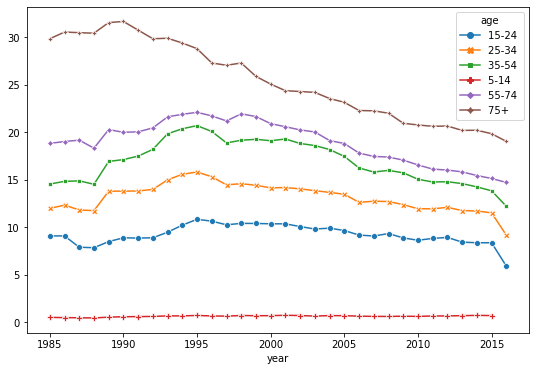

In [65]:
data_age = dataSuicides.groupby(['year','age'])['suicides_no','population'].sum()
data_reset = data_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot('year',data_reset.suicides_no*(10 **5) / data_reset.population,
            hue='age',data=data_reset,style='age',dashes=False,markers=True)
# plt.xticks(rotation=90)
# plt.show()

From above, now we know that the suicide rate is getting higher when the age is higher.That is, age is a factor of suicide

## $\textbf {The suicide rate of Generation}$

In [40]:
dataSuicides.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [75]:
dataSuicides.pivot_table(['suicides_no'],['generation']).sort_values(by='suicides_no',ascending=False)

,suicides_no
generation,
Boomers,457.815230
Silent,279.972344
Generation X,239.201623
G.I. Generation,185.863338
Millenials,106.683607
Generation Z,10.820408


In [97]:
dataSuicides.pivot_table(index='generation',aggfunc='sum').sort_values('suicides_no',ascending=False)


,HDI for year,gdp_per_capita ($),population,suicides/100k pop,suicides_no,year
generation,,,,,,
Boomers,949.212,79750168,13350511729,73563.05,2284498,9980242
Silent,1334.426,111948324,9220331647,117217.55,1781744,12743414
Generation X,1546.510,99996594,13472109292,67648.45,1532804,12813552
Millenials,1577.918,111331886,10649461202,31461.74,623459,11715748
G.I. Generation,453.876,28519510,2126202724,65708.86,510009,5466166
Generation Z,633.550,37678558,2503541842,944.18,15906,2955886


C:\Users\user\AppData\Local\Temp/ipykernel_10208/238314042.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='year'>

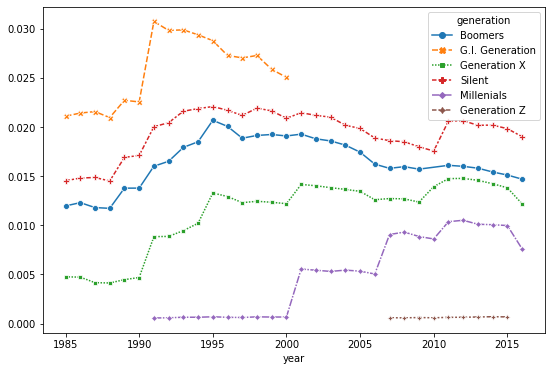

In [44]:
data_generation = dataSuicides.groupby(['year','generation'])['suicides_no','population'].sum()
data_generation_reset = data_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot('year',data_generation_reset.suicides_no*100 / data_generation_reset.population,data=data_generation_reset,
            style='generation',hue='generation',markers=True)


## $\textbf {Number of suicides committed in each country}$

In [5]:
data_country = dataSuicides.groupby('country')

In [6]:
data_country_series = data_country['suicides_no'].sum()

In [45]:
data_country_series.head()

country
Albania                 1970
Antigua and Barbuda       11
Argentina              82219
Armenia                 1905
Aruba                    101
Name: suicides_no, dtype: int64

In [99]:
data_country_series.corr

<bound method Series.corr of country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64>

In [100]:
data_country_series

21330

## $\textbf {Number of suicides genderwise in each country}$

In [69]:
country_gender_suicides = pd.DataFrame({
    'country' : dataSuicides.country,
    'sex' : dataSuicides.sex,
    'suicides_no' : dataSuicides.suicides_no
})

In [79]:
country_wise_gender = country_gender_suicides.pivot_table(index='country',columns='sex',aggfunc='sum')

In [80]:
country_wise_gender.iloc[0]

             sex   
suicides_no  female     693
             male      1277
Name: Albania, dtype: int64

In [82]:
country_wise_gender.columns = country_wise_gender.columns.droplevel()

In [83]:
country_wise_gender.female

country
Albania                    693
Antigua and Barbuda          1
Argentina                18326
Armenia                    495
Aruba                       17
                         ...  
United Arab Emirates        98
United Kingdom           32687
United States           213797
Uruguay                   2820
Uzbekistan                9260
Name: female, Length: 101, dtype: int64